### Adding dataset

In [2]:
# Import the OS module to interact with the operating system, such as handling file paths
import os

# Define the main data directory
data_dir = "/Users/nehasharma/Desktop/DATA_255/HW3/Dogs"
print(data_dir)

/Users/nehasharma/Desktop/DATA_255/HW3/Dogs


### Count images and print size

In [4]:
# Count images and print size
total_images = 0

# Walk through the data directory and its subdirectories

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.jpg')):  # Adjust for your image formats
            total_images += 1
            image_path = os.path.join(root, file)

print("Total images downloaded:", total_images)

Total images downloaded: 300


### Dataset

In [6]:
import pathlib  # Import pathlib to handle and manipulate file system paths in a platform-independent way
from PIL import Image  # Import Image from the Python Imaging Library (PIL) to work with image files

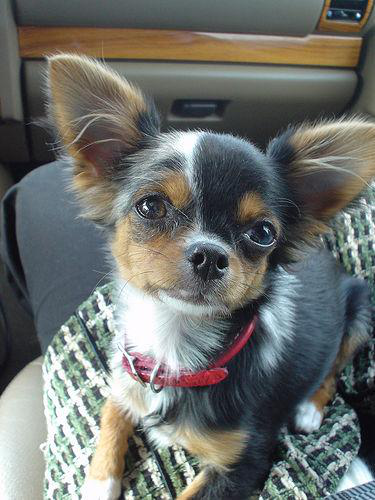

In [7]:
Chihuahua_path = pathlib.Path(data_dir) / "/Users/nehasharma/Desktop/DATA_255/HW3/Dogs/Chihuahua"  # Ensure correct path using pathlib
Chihuahua_imgs = list(Chihuahua_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(Chihuahua_imgs[0]))  # display the first image from the list

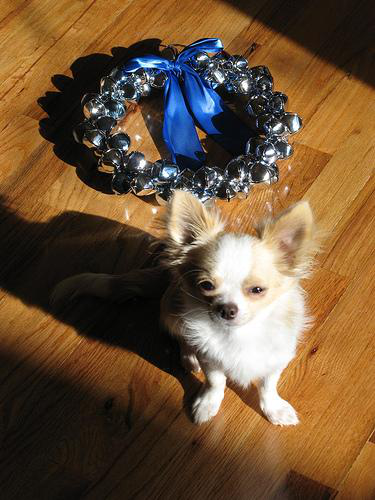

In [8]:
# Open the 8th image (index 7, since indexing starts at 0) from the Chihuahua_imgs list
Image.open(str(Chihuahua_imgs[7]))

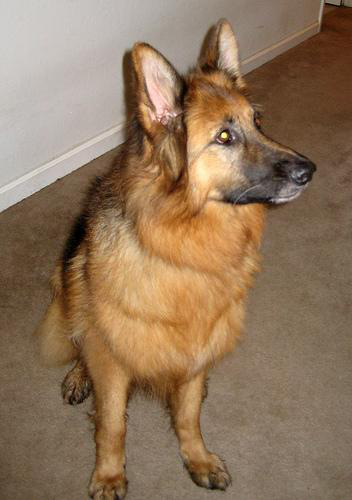

In [9]:
# Define the path to the German Shepherd image directory 
German_shepherd_path = pathlib.Path(data_dir) / "/Users/nehasharma/Desktop/DATA_255/HW3/Dogs/German_shepherd"

German_shepherd_imgs = list(German_shepherd_path.glob('*.jpg'))  # Use glob to search for all files with .jpg extension

# Open and display the first image from the list 
Image.open(str(German_shepherd_imgs[0]))

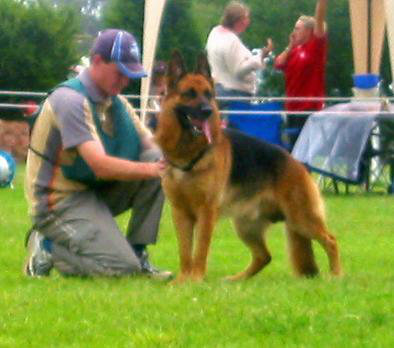

In [10]:
Image.open(str(German_shepherd_imgs[5]))

### Preaparing dataset

In [12]:
batch_size = 32  # Set the number of samples to be processed in each training iteration

In [13]:
# Import the datasets module for handling image datasets and transforms for preprocessing the data
from torchvision import datasets, transforms

In [14]:
# 1. Load the dataset and define a series of transformations for the input data
data_transform = transforms.Compose([
    transforms.Resize(256),   # Resize the image to 256x256 pixels while maintaining the aspect ratio
    transforms.CenterCrop(224),    # Crop the center of the image to 224x224 pixels
    transforms.ToTensor(),    # Convert the image to a PyTorch tensor (which changes the data format and normalizes pixel values between 0 and 1)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize the image using the mean and standard deviation values commonly used for pre-trained models (e.g., ImageNet)
])

### Split this data between 80% training and 20% test

In [16]:
from torchvision.datasets import ImageFolder  # Import ImageFolder for loading image datasets from directories
from torch.utils.data import DataLoader, random_split  # Import DataLoader to manage batches of data and random_split to split the dataset into training and validation sets

In [17]:
# Load the dataset from the directory, applying the specified transformations (resize, crop, normalize)
dataset = ImageFolder(data_dir, transform=data_transform)

# Calculate the size of the training dataset (80% of the total dataset)
train_size = int(0.8 * len(dataset))  # Multiply the total dataset size by 0.8 to get 80%

# Calculate the size of the validation dataset (remaining 20%)
val_size = len(dataset) - train_size  # Subtract the training size from the total size to get 20%

# Randomly split the dataset into training and validation sets using the calculated sizes
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [18]:
print(len(train_dataset))  # Print the number of images in the training dataset

240


In [19]:
print(len(val_dataset))    # Print the number of images in the validation dataset

60


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [21]:
class_names = dataset.classes  # Retrieve the list of class names from the dataset
print(class_names)              # Print the list of class names

['Chihuahua', 'German_shepherd', 'golden_retriever']


In [22]:
train_dataloader = DataLoader(train_dataset, batch_size=32)  # Create a DataLoader for the training dataset with a batch size of 32
val_dataloader = DataLoader(val_dataset, batch_size=32)      # Create a DataLoader for the validation dataset with a batch size of 32

## Visualize the data

Here are the first 9 images from the training dataset.

In [24]:
import torch  # Import PyTorch for tensor operations and model building
import torchvision  # Import torch-vision for datasets, model architectures, and transformations
import matplotlib.pyplot as plt 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


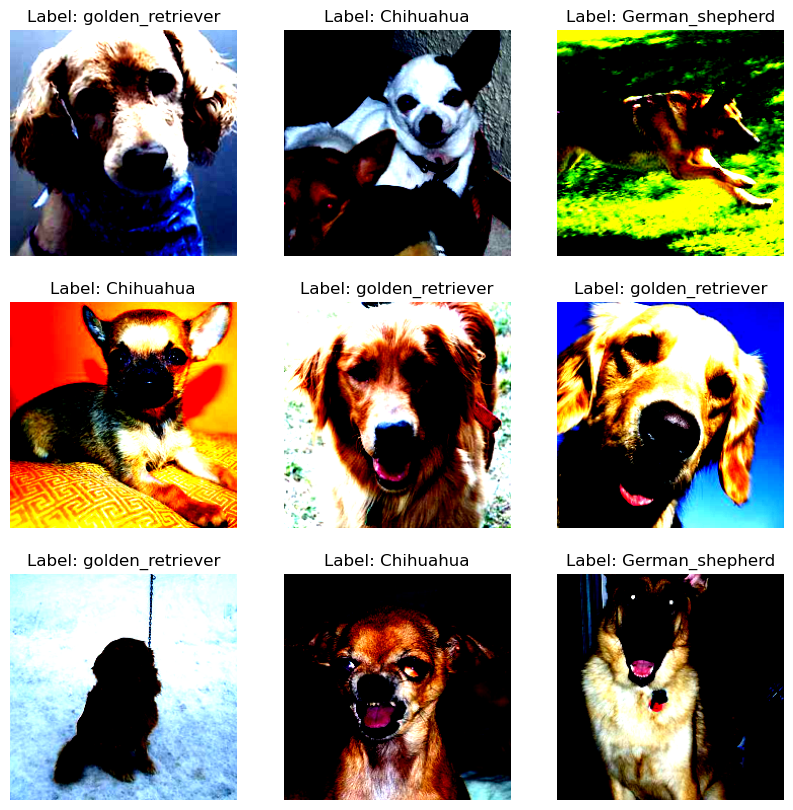

In [25]:
data_iter = iter(train_dataloader)    # Create an iterator from the training DataLoader

# Fetch the first batch of data
images, labels = next(data_iter)  

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()

In [26]:
for image_batch, labels_batch in train_dataloader: 
    print(image_batch.shape)  # Print the shape of the current batch of images
    print(labels_batch.shape)  # Print the shape of the current batch of labels
    break 

torch.Size([32, 3, 224, 224])
torch.Size([32])


The image_batch is a torch tensor of the shape (32, 3, 224, 224). This is a batch of 32 images of shape 224x224x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [28]:
print(len(train_dataloader.dataset))  # Print the total number of samples in the training dataset
print(train_dataloader.dataset[0][0].shape)  # Print the shape of the first image in the training dataset
print(train_dataloader.dataset[1][0].shape)  # Print the shape of the second image in the training dataset

240
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [29]:
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32])


# Build the model

In [31]:
import torch
import torch.nn as nn

# Define a custom neural network model class by extending nn.Module
class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()  # Call the parent class initializer
        
        # Rescaling layer: a 1x1 convolution followed by batch normalization and ReLU activation
        self.rescale = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),  # 1x1 convolution to rescale input channels
            nn.BatchNorm2d(3),  # Batch normalization to maintain stable scale during training
            nn.ReLU(inplace=True)  # Apply ReLU activation function in-place
        )
        
        # First convolutional layer: Conv2d with 3 input channels (RGB), 16 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # First pooling layer: max pooling with 2x2 window
        
        # Second convolutional layer: 16 input channels, 32 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Second pooling layer: 2x2 window
        
        # Third convolutional layer: 32 input channels, 64 output channels, 3x3 kernel
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Third pooling layer: 2x2 window
        
        # Flatten the input to feed into fully connected layers
        self.flatten = nn.Flatten()  # Flatten the multidimensional tensor into a vector
        
        # First fully connected (dense) layer: takes input of flattened image and outputs 128 features
        self.fc1 = nn.Linear(224 * 224 * 32, 128)
        
        # Second fully connected layer: outputs num_classes predictions
        self.fc2 = nn.Linear(128, num_classes)

    # Define the forward pass of the model
    def forward(self, x):
        x = self.rescale(x)  # Apply rescaling (conv + batch norm + ReLU)
        x = self.conv1(x)  # Apply first convolution
        x = nn.ReLU(inplace=True)(x)  # Apply ReLU activation
        x = self.pool1(x)  # Apply first max pooling
        x = self.conv2(x)  # Apply second convolution
        x = nn.ReLU(inplace=True)(x)  # Apply ReLU activation
        x = self.pool2(x)  # Apply second max pooling
        x = self.conv3(x)  # Apply third convolution
        x = nn.ReLU(inplace=True)(x)  # Apply ReLU activation
        x = self.pool3(x)  # Apply third max pooling
        x = self.flatten(x)  # Flatten the output from the convolutional layers
        x = self.fc1(x)  # Apply first fully connected layer
        x = nn.ReLU(inplace=True)(x)  # Apply ReLU activation
        x = self.fc2(x)  # Apply second fully connected layer to get class scores
        return x

# Instantiate the model with the desired number of output classes
num_classes = 3  # Example number of output classes
model = CustomModel(num_classes)

# Print the model architecture to check its layers and structure
print(model)

CustomModel(
  (rescale): Sequential(
    (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1605632, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


In [32]:
import torch
import torch.nn as nn

# Define a custom CNN model class inheriting from nn.Module
class CNNModel(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNNModel, self).__init__()  # Call the parent class constructor

        # Rescaling layer: a 1x1 convolution followed by batch normalization and ReLU activation
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),  # 1x1 convolution, keeps the channel dimensions the same (3 channels for RGB)
            nn.BatchNorm2d(3),  # Batch normalization to maintain stable input distributions
            nn.ReLU(inplace=True)  # ReLU activation applied in-place
        )

        # First convolutional layer: 3 input channels (RGB), 16 output channels, 3x3 kernel with padding
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Padding ensures spatial dimensions remain unchanged

        # Max-pooling layer: reduces spatial dimensions by half
        self.pool = nn.MaxPool2d(2, 2)  # MaxPool with a 2x2 kernel and stride of 2

        # Second convolutional layer: 16 input channels, 32 output channels, 3x3 kernel with padding
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        # Third convolutional layer: 32 input channels, 64 output channels, 3x3 kernel with padding
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Flatten layer to convert 3D tensor into a 1D vector for fully connected layers
        self.flatten = nn.Flatten()

        # Fully connected layer: input size is the product of the spatial dimensions after pooling and the output channels
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)  # 64 channels, reduced by pooling

        # Second fully connected layer: maps 128 hidden units to the number of output classes
        self.fc2 = nn.Linear(128, num_classes)

    # Define the forward pass
    def forward(self, x):
        x = self.rescaling(x)  # Apply rescaling (1x1 convolution, batch norm, ReLU)
        x = self.pool(nn.functional.relu(self.conv1(x)))  # Apply first convolution, ReLU, and pooling
        x = self.pool(nn.functional.relu(self.conv2(x)))  # Apply second convolution, ReLU, and pooling
        x = self.pool(nn.functional.relu(self.conv3(x)))  # Apply third convolution, ReLU, and pooling
        x = self.flatten(x)  # Flatten the tensor into a 1D vector
        x = nn.functional.relu(self.fc1(x))  # Apply first fully connected layer and ReLU
        x = self.fc2(x)  # Apply second fully connected layer to output class predictions
        return x

# Define input image dimensions
img_height, img_width = 224, 224  # Image height and width (typical for pre-trained models like ResNet)

# Define the number of output classes for classification
num_classes = 3  # Number of classes to predict (e.g., 3 dog breeds)

# Instantiate the model
model = CNNModel(num_classes, img_height, img_width)

# Print the model structure
print(model)

CNNModel(
  (rescaling): Sequential(
    (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


Compile the model: choose the optimizers. Adam optimizer and losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [34]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())  # Adam optimizer will update model's weights

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification tasks

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)  
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))  # Calculate accuracy

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):  
        model.train()  
        train_loss = 0.0  # Initialize cumulative loss for the epoch
        train_acc = 0.0  # Initialize cumulative accuracy for the epoch

        for images, labels in train_dl:  # Loop over batches
            optimizer.zero_grad()  # Zero the gradients from the previous step
            outputs = model(images)  # Forward pass: get model predictions
            loss = criterion(outputs, labels)  # Calculate the loss based on predictions and actual labels
            loss.backward()  # Backward pass: calculate gradients
            optimizer.step()  # Update model weights using optimizer

            # Compute training accuracy for the current batch
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)  # Accumulate accuracy for all samples

            # Track training loss for the current batch
            train_loss += loss.item() * images.size(0)  # Accumulate loss for all samples

        # Calculate average loss and accuracy for the epoch
        epoch_loss = train_loss / len(train_dl.dataset)  # Average loss over all samples in the dataset
        epoch_acc = train_acc / len(train_dl.dataset)  # Average accuracy over all samples in the dataset
        
        # Print training statistics for the current epoch
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)  # Call the training loop

Epoch 1/10, Loss: 1.1320, Accuracy: 0.3958
Epoch 2/10, Loss: 1.0408, Accuracy: 0.5208
Epoch 3/10, Loss: 0.9136, Accuracy: 0.5833
Epoch 4/10, Loss: 0.7540, Accuracy: 0.6542
Epoch 5/10, Loss: 0.5755, Accuracy: 0.7583
Epoch 6/10, Loss: 0.4108, Accuracy: 0.8542
Epoch 7/10, Loss: 0.2381, Accuracy: 0.9167
Epoch 8/10, Loss: 0.1916, Accuracy: 0.9292
Epoch 9/10, Loss: 0.1861, Accuracy: 0.9167
Epoch 10/10, Loss: 0.1640, Accuracy: 0.9500


Training loop with Data Augmentation layers to avoid overfitting

In [36]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())  # Adam optimizer to adjust model weights during training

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function for multi-class classification

# Define the accuracy metric
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)  # Get the predicted class with the highest probability
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))  # Calculate accuracy by comparing predictions to actual labels

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):  # Loop through each epoch
        model.train()  # Set the model to training mode
        train_loss = 0.0  # Initialize the cumulative training loss
        train_acc = 0.0  # Initialize the cumulative training accuracy

        for images, labels in train_dl:  # Loop through each batch of data
            # Apply data augmentation: Random horizontal flip and random rotation
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])

            optimizer.zero_grad()  # Reset gradients to zero before each step
            outputs = model(images)  # Forward pass: get predictions from the model
            loss = criterion(outputs, labels)  # Calculate the loss based on predictions and true labels
            loss.backward()  # Backward pass: compute gradients
            optimizer.step()  # Optimize: update model parameters

            # Calculate training accuracy for this batch
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)  # Accumulate accuracy for the entire batch

            # Track the cumulative training loss for this batch
            train_loss += loss.item() * images.size(0)  # Accumulate loss for the entire batch

        # Calculate average loss and accuracy for the epoch
        epoch_loss = train_loss / len(train_dl.dataset)  # Average loss over the entire dataset
        epoch_acc = train_acc / len(train_dl.dataset)  # Average accuracy over the entire dataset
        
        # Print training statistics for the current epoch
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 3  # Number of training epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)  # Start the training process

Epoch 1/10, Loss: 0.1930, Accuracy: 0.9208
Epoch 2/10, Loss: 0.1067, Accuracy: 0.9583
Epoch 3/10, Loss: 0.1607, Accuracy: 0.9458
Epoch 4/10, Loss: 0.0775, Accuracy: 0.9667
Epoch 5/10, Loss: 0.0379, Accuracy: 0.9917
Epoch 6/10, Loss: 0.0586, Accuracy: 0.9833
Epoch 7/10, Loss: 0.0286, Accuracy: 0.9917
Epoch 8/10, Loss: 0.0080, Accuracy: 1.0000
Epoch 9/10, Loss: 0.0060, Accuracy: 1.0000
Epoch 10/10, Loss: 0.0027, Accuracy: 1.0000


In [38]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

# Define input image dimensions
img_height, img_width = 224, 224

# Define the URL of the image to be used
chihuahua_url = "https://thumb.photo-ac.com/cd/cdecdafb2199f58b4638ed0f52d0f286_w.jpeg"

# Download the image from the URL
response = requests.get(chihuahua_url)  # Send an HTTP GET request to fetch the image

# Open the image using PIL and convert it to RGB format (in case it's not in RGB)
img = Image.open(BytesIO(response.content)).convert('RGB')

# Resize the image to match the input size required by the model
img = img.resize((img_width, img_height))

# Convert the PIL image to a PyTorch tensor (normalizes pixel values to range [0, 1])
img_tensor = transforms.ToTensor()(img)

# Add a batch dimension to the tensor (PyTorch models expect a batch dimension)
img_tensor = img_tensor.unsqueeze(0)

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the image tensor to the appropriate device (GPU/CPU)
img_tensor = img_tensor.to(device)

In [40]:
# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  
    outputs = model(img_tensor)  
    probabilities = torch.softmax(outputs, dim=1)  # Apply softmax to convert logits into class probabilities

# Convert tensor to numpy array
predicted_class = class_names[argmax(probabilities)]  # Find the class with the highest probability and map it to its name

# Print the predicted class and confidence
predicted_class = class_names[torch.argmax(probabilities)]  # Get the index of the highest probability and map to class name
confidence = torch.max(probabilities).item()  # Get the maximum probability as the confidence score
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")  # Print the predicted class and its confidence

This image most likely belongs to Chihuahua with a 91.98% confidence.


In [54]:
# Load and preprocess the unseen image
image_path = '/Users/nehasharma/Desktop/DATA_255/HW3/cute-white-chihuahua-with-sweater_181624-32916.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [56]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to German_shepherd with a 91.98% confidence.


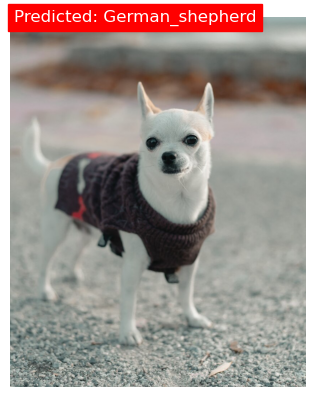

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()